In [1]:
import numpy as np
import pandas as pd
from time import time
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [2]:
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}
import matplotlib.pyplot as plt

In [3]:
X = pd.read_pickle('PCA_matrix.pkl')

In [34]:
articles = pd.read_pickle('en_wikipedia_titles.pkl_df_500001_nlp.pkl')

In [4]:
X.shape

(47300, 400)

In [22]:
pca = PCA(n_components=30)
pca.fit(X)
X_reduced = pca.transform(X)

In [23]:
X_reduced.shape

(47300, 30)

In [24]:
np.random.seed(1)
randindex = np.random.choice(range(X_reduced.shape[0]),size=1000,replace=False) 
XX = X_reduced[randindex,]

In [25]:
XX.shape

(1000, 30)

In [26]:
from time import time
import matplotlib.pyplot as plt
t0 = time()
print(t0)
tsne = TSNE(n_components=2, init='pca', random_state=0)
Y = tsne.fit_transform(XX)
t1 = time()
print("t-SNE: %.2g sec" % (t1 - t0))

1469734874.158001
t-SNE: 6.3 sec


In [27]:
Y[:,0].shape

(1000,)

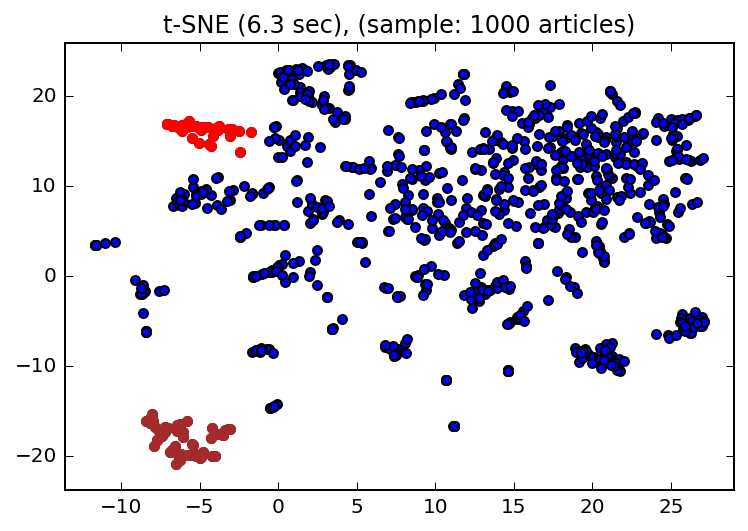

In [36]:
ind1 = (Y[:,0] < -1.7) & (Y[:,1] > 13)
ind2 = (Y[:,0] < -2) & (Y[:,1] < -12)
f, ax = plt.subplots()
plt.scatter(Y[:, 0], Y[:, 1] )
plt.scatter(x=Y[ind1, 0], y=Y[ind1, 1] , color='red')
plt.scatter(x=Y[ind2, 0], y=Y[ind2, 1] , color='brown')
plt.title("t-SNE (%.2g sec), (sample: %d articles)" % (t1 - t0, XX.shape[0]))
plt.axis('tight')
plt.show()

In [40]:
print( 'example topic 1:\n', articles.iloc[randindex[ind1]]['title'],'\n'+'*'*10+'\n' )
print( 'example topic 2:\n', articles.iloc[randindex[ind2]]['title']  )

example topic 1:
 32418                 Gauri: The Unborn
27920          Still Waters (1915 film)
33890      Christoforos Nezer (d. 1996)
20317                       Billy Weber
1462                 Run Wild, Run Free
20706             Strange Affair (film)
34680                  Certainty (film)
15775                   L'Enfant (film)
31220             Joseph Ashton (actor)
39898                      Nezha (film)
4211              The Amazing Dobermans
44948                     Paola Igliori
18923             Ikkareyanente Manasam
25984                    Pierre Tornade
9131                 Convent of Sinners
34386                     Samantha Ryan
38188             Matthew Postlethwaite
31515                    Natalie Bible'
20589                Angela (2002 film)
8875                 Hidden City (film)
30820                      Matt Charman
20151                Mother Lode (film)
34615     Whistle Down the Wind (novel)
5703                     Gilbert Church
18714                 